<strong>Suport Vector Machines</strong>

Mais conhecido como SVM, é um importante algoritmo de Machine Learning amplamente utilizado para resolver problemas em que acertar a resposta correta possui alta prioridade. Trabalham extremamente bem com datasets pequenos e não necessitam de muita otimização para melhorar significativamente sua performance. Além disso, são bons modelos para detecção de outliers.

Ainda sobre as vantagens deste algoritmo, vale destacar que são muito úteis quando o número de features é maior que o número de samples. Além disso, trabalham bem em dimensões mais altas (é a essência do método, na realidade).

Entretanto, um número de features muito maior que o número de samples pode levar o modelo a sofrer overfitting, sendo então necessária a utilização de técnicas de regularização para contornar este problema.

<strong>Ideia do método</strong>

O método consiste em, dado um problema que habita em um espaço $n-dimensional$, buscar um hiperplano de dimensão $n-1$ que melhor separa dados de classes distintas. Esta separação utiliza como critério para mensurar o quão bom o hiperplano é em separar os dados, a distância entre o hiperplano e os pontos do conjunto de treinamento. Assim, busca-se pela máxima distância entre os pontos e o hiperplano. O conjunto de pontos que satisfaz essa máxima distância são chamados de vetores de suporte e a distância máxima é conhecida como margem.

Imagine que temos um hiperplano traçado que divide o conjunto de dados (considere um problema binário com classes $y$ iguais a +1 ou -1) e queremos determinar a classe de um certo elemento descrito pelo vetor $x$, suas coordenadas. Seja $w$ o vetor normal ao hiperplano e $b$ uma medida de translação do hiperplano em relação a origem. Se tomarmos o produto interno entre esses vetores e usarmos $b$ como referência, conseguimos determinar a qual classe nosso dado observado pertence, visto que colocamos as seguintes restrições:

$$w^{T}.x_{+} + b \geq 1 $$
$$w^{T}.x_{-} + b \leq -1 $$

ou então simplesmente $y_{i}.(w^{T}.x_{i} + b) \geq 1$. Além disso, consideramos que para os vetores de suporte, a igualdade é válida na equação anterior. Desta forma, pensando em maximizar a distância entre os vetores de suporte e o hiperplano, observamos que estamos tomando a projeção da diferença entre vetores de suporte sobre o vetor $w$. Portanto, considerando que sobre os vetores de suporte temos que $y_{i}.(w^{T}.x_{i} + b) = 1$,a diferença entre vetores de suporte de classes distintas é dada por:

$$ dist = \dfrac{1 - b - (-1 - b)}{||w^{T}||} = \dfrac{2}{ ||w^{T}||}$$

Assim, para determinar a melhor distância possível é necessário minimizar o tamanho da norma de $w$. Podemos então resolver o seguinte problema já regularizado:

$$ min \dfrac{1}{2}.w^{T}.w + C.\sum_{i = 1}^{n} ϵ_{i}$$

$$s.a.$$ $$  y_{i}.(w^{T}.x_{i} + b) \geq 1 - ϵ_{i}$$ $$ ϵ_{i} \geq 0$$ $$ i = 1,..,n$$

Essa é a ideia para construção, na prática resolvemos o problema dual através do truque do kernel. Mais detalhes podem ser encontrados nas referências, vamos para a prática!

In [ ]:
pip install --update pandas


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --update


In [ ]:
# Importando as bibliotecas necessárias
# https://www.youtube.com/watch?v=8A7L0GsBiLQ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/default of credit card clients.xls - Data.csv', header = 1,sep = ',')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.rename({'default payment next month': 'DEFAULT'},axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.drop('ID',axis = 1,inplace = True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
DEFAULT      int64
dtype: object

In [ ]:
df['SEX'].unique()

array([2, 1])

In [ ]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [ ]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
# Vamos ver a quantidade de dados faltantes
len(df.loc[(df['MARRIAGE'] == 0) | (df['EDUCATION'] == 0)])

68

In [ ]:
len(df)

30000

In [ ]:
df_not_missing = df.loc[(df['MARRIAGE'] != 0) & (df['EDUCATION'] != 0)]
df_not_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
len(df_not_missing)

29932

In [ ]:
df_no_default = df_not_missing[df_not_missing['DEFAULT'] == 0]
df_default = df_not_missing[df_not_missing['DEFAULT'] == 1]

In [ ]:
df_no_default_downsample = resample(df_no_default,random_state = 42,n_samples = 1000,replace = False)
df_default_downsample = resample(df_default,random_state = 42,n_samples = 1000,replace = False)

In [ ]:
df_downsample = pd.concat((df_no_default_downsample,df_default_downsample))
print(f"O novo tamanho é: {len(df_downsample)}")
df_downsample.head()

O novo tamanho é: 2000


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,0
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0


In [ ]:
X = df_downsample.drop('DEFAULT',axis = 1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,-2,100143,50456,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,0,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,0,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,-2,355,975,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,0,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [ ]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

In [ ]:
X_encoded = pd.get_dummies(X,columns = ['SEX','EDUCATION','MARRIAGE',
                                        'PAY_0',
                                        'PAY_2',
                                        'PAY_2',
                                        'PAY_3',
                                        'PAY_4',
                                        'PAY_5',
                                        'PAY_6'])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_0_-2,PAY_0_-1,PAY_0_0,PAY_0_1,PAY_0_2,PAY_0_3,PAY_0_4,PAY_0_5,PAY_0_6,PAY_0_7,PAY_0_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,...,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_7,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,1500,1056,950,1000,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [ ]:
# Treinando o modelo SVM
clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled,y_train)

SVC(random_state=42)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


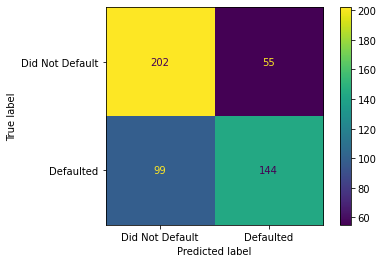

In [ ]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did Not Default', 'Defaulted'])

In [ ]:
param_grid = [ {
                'C': [0.5,1,10,100],
                'gamma': ['scale',1,0.1,0.01,0.001,0.0001],
                'kernel': ['rbf']}]


optimal_parameters = GridSearchCV(SVC(),
                                  param_grid,
                                  cv = 5,
                                  scoring = 'accuracy',
                                  verbose = 0)

optimal_parameters.fit(X_train_scaled,y_train)
print(optimal_parameters.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
clf_svm = SVC(C = 100, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


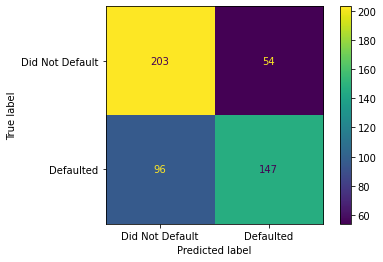

In [ ]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      values_format = 'd',
                      display_labels = ['Did Not Default', 'Defaulted'])

<strong>Referências</strong>

* https://scikit-learn.org/stable/modules/svm.html
* https://medium.com/@msremigio/m%C3%A1quinas-de-vetores-de-suporte-svm-77bb114d02fc
* https://towardsdatascience.com/understanding-support-vector-machine-part-1-lagrange-multipliers-5c24a52ffc5e
* https://towardsdatascience.com/understanding-support-vector-machine-part-2-kernel-trick-mercers-theorem-e1e6848c6c4d
* https://www.youtube.com/watch?v=8A7L0GsBiLQ